In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Comparison ##

In [2]:
3 > 1

True

In [3]:
type(3 > 1)

bool

In [4]:
True

True

In [5]:
true

NameError: name 'true' is not defined

In [6]:
3 = 3

SyntaxError: can't assign to literal (<ipython-input-6-79bfd1be65e2>, line 1)

In [7]:
3 == 3.0

True

In [8]:
10 != 2

True

In [9]:
x = 14
y = 3

In [10]:
x > 15

False

In [11]:
12 < x

True

In [12]:
x < 20

True

In [13]:
12 < x < 20

True

In [14]:
10 < x-y < 13

True

In [15]:
x > 13 and y < 3.14159

True

## Comparisons with arrays

In [16]:
pets = make_array('cat', 'cat', 'dog', 'cat', 'dog', 'rabbit')

In [17]:
pets == 'cat'

array([ True,  True, False,  True, False, False])

In [18]:
1 + 1 + 0 + 1 + 0 + 0

3

In [19]:
sum(make_array(True, True, False, True, False, False))

3

In [20]:
sum(pets == 'dog')

2

In [21]:
np.count_nonzero(pets == 'dog')

2

In [22]:
x = np.arange(20, 31)

In [23]:
x > 28

array([False, False, False, False, False, False, False, False, False,
        True,  True])

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

Steps:
1. Find a way to simulate two dice rolls.
2. Compute how much money we win/lose based on the result.
3. Do steps 1 and 2 10,000 times.

### Conditional Statements

In [24]:
# Work in progress
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1

In [25]:
one_round(4, 3)

1

In [26]:
one_round(2, 6)

In [27]:
# Final correct version
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [28]:
one_round(1, 1)

0

In [29]:
one_round(6, 5)

1

In [30]:
one_round(7, -1)

1

### Random Selection

In [31]:
mornings = make_array('wake up', 'sleep in')

In [32]:
np.random.choice(mornings)

'wake up'

In [33]:
np.random.choice(mornings)

'wake up'

In [34]:
np.random.choice(mornings)

'sleep in'

In [35]:
np.random.choice(mornings, 7)

array(['wake up', 'wake up', 'wake up', 'wake up', 'wake up', 'wake up',
       'sleep in'], dtype='<U8')

In [36]:
sum(np.random.choice(mornings, 7) == 'wake up')

2

In [37]:
sum(np.random.choice(mornings, 7) == 'sleep in')

4

In [38]:
morning_week = np.random.choice(mornings, 7)
morning_week

array(['wake up', 'wake up', 'wake up', 'sleep in', 'wake up', 'wake up',
       'sleep in'], dtype='<U8')

In [39]:
sum(morning_week == 'wake up')

5

In [40]:
sum(morning_week == 'sleep in')

2

In [41]:
die_faces = np.arange(1, 7)

In [42]:
np.random.choice(die_faces)

4

In [43]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [44]:
simulate_one_round()

0

### Appending Arrays

In [45]:
first = np.arange(4)
second = np.arange(10, 17)

In [46]:
np.append(first, 6)

array([0, 1, 2, 3, 6])

In [47]:
first

array([0, 1, 2, 3])

In [48]:
np.append(first, second)

array([ 0,  1,  2,  3, 10, 11, 12, 13, 14, 15, 16])

In [49]:
first

array([0, 1, 2, 3])

In [50]:
second

array([10, 11, 12, 13, 14, 15, 16])

### Repeated Betting ###

In [51]:
results = make_array()

In [52]:
results = np.append(results, simulate_one_round())
results

array([1.])

## `For` Statements

In [53]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [54]:
pet = make_array('cat', 'dog', 'rabbit').item(0)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(1)
print('I love my ' + pet)

pet = make_array('cat', 'dog', 'rabbit').item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [55]:
game_outcomes = make_array()

for i in np.arange(5):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 0.,  1.,  0., -1.,  0.])

In [88]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([-1.,  1.,  1., ..., -1., -1.,  1.])

In [89]:
len(game_outcomes)

10000

In [90]:
results = Table().with_column('My winnings', game_outcomes)

In [91]:
results.group('My winnings')

My winnings,count
-1,4166
0,1669
1,4165


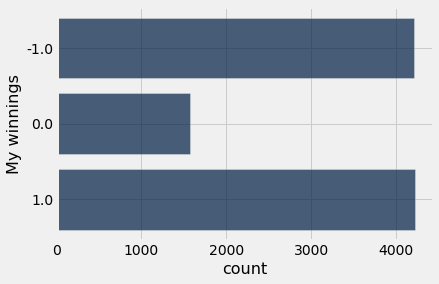

In [60]:
results.group('My winnings').barh('My winnings')

In [61]:
# Bonus question: This simulation is relatively simple. 
# Can you find a way to run it without using a for loop?

### Another example: simulating heads in 100 coin tosses

In [62]:
coin = make_array('heads', 'tails')

In [63]:
sum(np.random.choice(coin, 100) == 'heads')

51

In [64]:
# Simulate one outcome

def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [65]:
# Decide how many times you want to repeat the experiment

repetitions = 10000

In [66]:
# Simulate that many outcomes

outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())

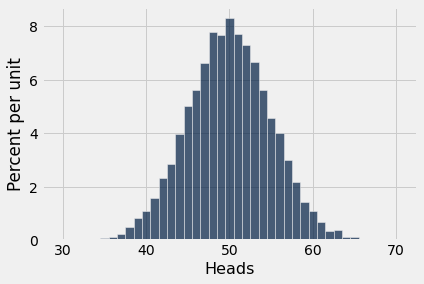

In [67]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

## Optional: Advanced `where` ##

In [68]:
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_column('Age', ages)

In [69]:
age

Age
16
22
18
15
19
15
16
21


In [70]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [71]:
voter = ages >= 18

In [72]:
voter

array([False,  True,  True, False,  True, False, False,  True])

In [73]:
age.where(voter)

Age
22
18
19
21


In [74]:
is_voter = are.above_or_equal_to(18)

In [75]:
type(is_voter)

datascience.predicates._combinable

In [76]:
is_voter(22)

True

In [77]:
is_voter(3)

False

In [78]:
age.apply(is_voter, 'Age')

array([False,  True,  True, False,  True, False, False,  True])

In [79]:
ages >= 18

array([False,  True,  True, False,  True, False, False,  True])

In [80]:
voter

array([False,  True,  True, False,  True, False, False,  True])

In [81]:
def my_voter_function(x):
    return x >= 18

In [82]:
age.where('Age', are.above_or_equal_to(18))

Age
22
18
19
21


In [83]:
age.where(voter)

Age
22
18
19
21


In [84]:
age.where('Age', my_voter_function)

Age
22
18
19
21
